# Sentiment analysis

In [2]:
import pandas as pd
import nltk
import spacy

from IPython.display import Image

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import stylecloud

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/fernandocosta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/fernandocosta/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
df_avatar = pd.read_csv('../../datasets/avatar.csv', engine='python', encoding = 'unicode_escape')

In [12]:
# wragling data
df_avatar_lines = df_avatar.groupby('character').count()
df_avatar_lines = df_avatar_lines.sort_values(by=['character_words'], ascending=False)[:10]
top_character_names = df_avatar_lines.index.values

# filtering out non-top characters
df_character_sentiment = df_avatar[df_avatar['character'].isin(top_character_names)]
df_character_sentiment = df_character_sentiment[['character', 'character_words']]

# calculating sentiment score
sid = SentimentIntensityAnalyzer()
df_character_sentiment.reset_index(inplace=True, drop=True)
df_character_sentiment[['neg', 'neu', 'pos', 'compound']] = df_character_sentiment['character_words'].apply(sid.polarity_scores).apply(pd.Series)
df_character_sentiment

,character,character_words,neg,neu,pos,compound
0,Katara,Water. Earth. Fire. Air. My grandmother used t...,0.196,0.735,0.069,-0.9718
1,Sokka,It's not getting away from me this time. Watc...,0.000,1.000,0.000,0.0000
2,Katara,"Sokka, look!",0.000,1.000,0.000,0.0000
3,Sokka,"Sshh! Katara, you're going to scare it away. ...",0.200,0.800,0.000,-0.5411
4,Katara,"But, Sokka! I caught one!",0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
7053,Zuko,At least you don't look like a boar-q-pine! My...,0.183,0.817,0.000,-0.4007
7054,Suki,And why did you paint me firebending?,0.000,1.000,0.000,0.0000
7055,Sokka,I thought it looked more exciting that way. O...,0.000,0.687,0.313,0.7501
7056,Iroh,"Hey, my belly's not that big anymore. I've rea...",0.000,1.000,0.000,0.0000


# Entity recognition

In [13]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Biden invites Ukrainian president to White House this summer")
print([(X.text, X.label_) for X in doc.ents])

[('Biden', 'PERSON'), ('Ukrainian', 'NORP'), ('White House', 'ORG'), ('this summer', 'DATE')]


# Stemming

Here are two different stemmers that will work differently:

In [14]:
# PorterStemmer
porter = PorterStemmer()

# LancasterStemmer
lancaster = LancasterStemmer()

print(porter.stem("friendship"))
print(lancaster.stem("friendship"))

friendship
friend


# Lemmatization

In [15]:
lemmatizer = WordNetLemmatizer()
words = ['articles', 'friendship', 'studies', 'phones']
for word in words:
    print(lemmatizer.lemmatize(word))

article
friendship
study
phone


# Bag of words

In [30]:
text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]
df = pd.DataFrame({'review': ['review1', 'review2'], 'text':text})
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df['text'])
df_dtm = pd.DataFrame(cv_matrix.toarray(),
                      index=df['review'].values,
                      columns=cv.get_feature_names())
df_dtm

/Users/fernandocosta/opt/anaconda3/envs/ironhack/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,code,hate,java,love,python,writing
review1,2,0,0,2,2,1
review2,2,2,2,0,0,1


# Term frequency

In [29]:
text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]


df = pd.DataFrame({'review': ['review1', 'review2'], 'text':text})
tfidf = TfidfVectorizer(stop_words='english', norm=None)
tfidf_matrix = tfidf.fit_transform(df['text'])


df_dtm = pd.DataFrame(tfidf_matrix.toarray(),
                      index=df['review'].values,
                      columns=tfidf.get_feature_names())
df_dtm

/Users/fernandocosta/opt/anaconda3/envs/ironhack/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,code,hate,java,love,python,writing
review1,2.0,0.00000,0.00000,2.81093,2.81093,1.0
review2,2.0,2.81093,2.81093,0.00000,0.00000,1.0


# Cloud

In [4]:
stylecloud.gen_stylecloud(file_path='../../datasets/speech.txt',
                         icon_name='fas fa-dog',
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='black',
                          gradient='horizontal')

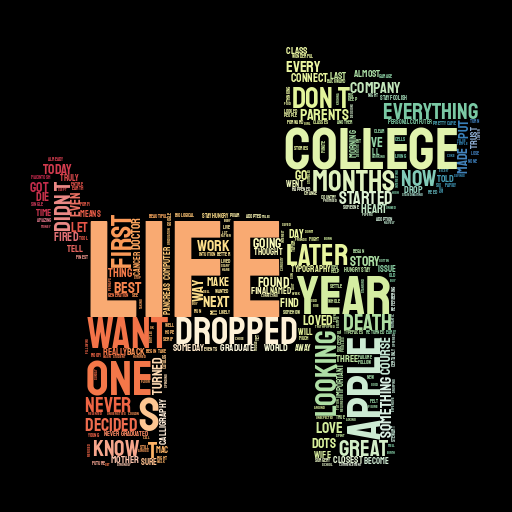

In [24]:
Image(filename='stylecloud.png') 